### Introduction
<it>This EDA looks at crime incident reports in the city of Boston from June 2015 to September 2018.<it>

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import folium
from folium.plugins import HeatMap
import plotly.express as px


In [2]:
# Import data
boston_data = pd.read_csv('crime.csv', encoding='latin-1')

# Peek
print(boston_data.head())

#shape
print(boston_data.shape)

  INCIDENT_NUMBER  OFFENSE_CODE    OFFENSE_CODE_GROUP   OFFENSE_DESCRIPTION  \
0      I182070945           619               Larceny    LARCENY ALL OTHERS   
1      I182070943          1402             Vandalism             VANDALISM   
2      I182070941          3410                 Towed   TOWED MOTOR VEHICLE   
3      I182070940          3114  Investigate Property  INVESTIGATE PROPERTY   
4      I182070938          3114  Investigate Property  INVESTIGATE PROPERTY   

  DISTRICT REPORTING_AREA SHOOTING     OCCURRED_ON_DATE  YEAR  MONTH  \
0      D14            808      NaN  2018-09-02 13:00:00  2018      9   
1      C11            347      NaN  2018-08-21 00:00:00  2018      8   
2       D4            151      NaN  2018-09-03 19:27:00  2018      9   
3       D4            272      NaN  2018-09-03 21:16:00  2018      9   
4       B3            421      NaN  2018-09-03 21:05:00  2018      9   

  DAY_OF_WEEK  HOUR    UCR_PART       STREET        Lat       Long  \
0      Sunday    13   

In [3]:
#statistic of dataset
boston_data.describe()

OFFENSE_CODE           YEAR          MONTH           HOUR  \
count  319073.000000  319073.000000  319073.000000  319073.000000   
mean     2317.546956    2016.560586       6.609719      13.118205   
std      1185.285543       0.996344       3.273691       6.294205   
min       111.000000    2015.000000       1.000000       0.000000   
25%      1001.000000    2016.000000       4.000000       9.000000   
50%      2907.000000    2017.000000       7.000000      14.000000   
75%      3201.000000    2017.000000       9.000000      18.000000   
max      3831.000000    2018.000000      12.000000      23.000000   

                 Lat           Long  
count  299074.000000  299074.000000  
mean       42.214381     -70.908272  
std         2.159766       3.493618  
min        -1.000000     -71.178674  
25%        42.297442     -71.097135  
50%        42.325538     -71.077524  
75%        42.348624     -71.062467  
max        42.395042      -1.000000

Nothing concluive from statistic

In [4]:
# check null and Dtypes
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      319073 non-null  object 
 1   OFFENSE_CODE         319073 non-null  int64  
 2   OFFENSE_CODE_GROUP   319073 non-null  object 
 3   OFFENSE_DESCRIPTION  319073 non-null  object 
 4   DISTRICT             317308 non-null  object 
 5   REPORTING_AREA       319073 non-null  object 
 6   SHOOTING             1019 non-null    object 
 7   OCCURRED_ON_DATE     319073 non-null  object 
 8   YEAR                 319073 non-null  int64  
 9   MONTH                319073 non-null  int64  
 10  DAY_OF_WEEK          319073 non-null  object 
 11  HOUR                 319073 non-null  int64  
 12  UCR_PART             318983 non-null  object 
 13  STREET               308202 non-null  object 
 14  Lat                  299074 non-null  float64
 15  Long             

In [5]:
# checking number of unique values in each column
boston_data.nunique()

INCIDENT_NUMBER        282517
OFFENSE_CODE              222
OFFENSE_CODE_GROUP         67
OFFENSE_DESCRIPTION       244
DISTRICT                   12
REPORTING_AREA            879
SHOOTING                    1
OCCURRED_ON_DATE       233229
YEAR                        4
MONTH                      12
DAY_OF_WEEK                 7
HOUR                       24
UCR_PART                    4
STREET                   4657
Lat                     18178
Long                    18178
Location                18194
dtype: int64

In [6]:
#percentage of Null values
for col in boston_data.columns:
    print(f"{col} : {round(boston_data[col].isnull().sum()/len(boston_data) * 100,2)} %")

INCIDENT_NUMBER : 0.0 %
OFFENSE_CODE : 0.0 %
OFFENSE_CODE_GROUP : 0.0 %
OFFENSE_DESCRIPTION : 0.0 %
DISTRICT : 0.55 %
REPORTING_AREA : 0.0 %
SHOOTING : 99.68 %
OCCURRED_ON_DATE : 0.0 %
YEAR : 0.0 %
MONTH : 0.0 %
DAY_OF_WEEK : 0.0 %
HOUR : 0.0 %
UCR_PART : 0.03 %
STREET : 3.41 %
Lat : 6.27 %
Long : 6.27 %
Location : 0.0 %


We can see that column ``SHOOTING`` contains most of null values so we can drop that

In [7]:
boston_data = boston_data.drop('SHOOTING', axis = 1)

In [8]:
#defining numerical & categorical columns
numerical_features = [feature for feature in boston_data.columns if boston_data[feature].dtype != 'O']
categorical_features = [feature for feature in boston_data.columns if boston_data[feature].dtype == 'O']

In [9]:
#renaming the columns
rename = {'OFFENSE_CODE_GROUP':'Group',
          'SHOOTING':'Shooting',
          'OFFENSE_DESCRIPTION':'Description',
          'DISTRICT':'District',
          'STREET':'Street',        
          'OCCURRED_ON_DATE':'Date',
          'YEAR':'Year',
          'MONTH':'Month',
          'DAY_OF_WEEK':'Day',
          'HOUR':'Hour'}

boston_data.rename(index=str, columns=rename, inplace=True)

### Types of serious crimes

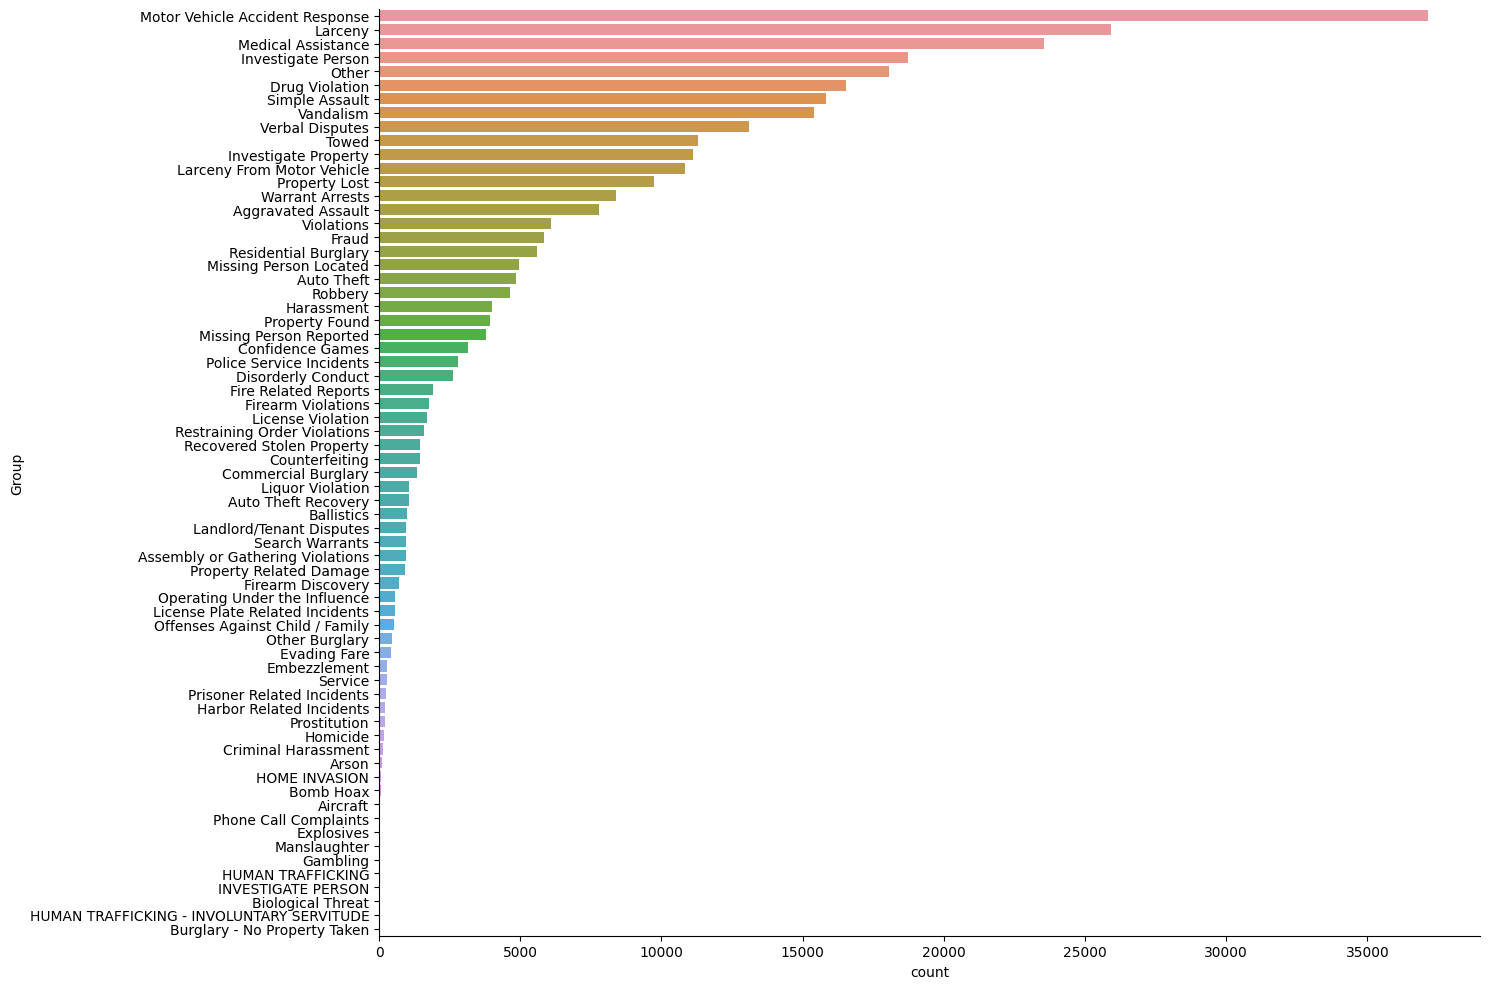

In [10]:
# Countplot for crime types
sns.catplot(y='Group',
           kind='count',
            height=10, 
            aspect=1.5,
            order=boston_data.Group.value_counts().index,
           data=boston_data)

<Axes: xlabel='Group', ylabel='count'>

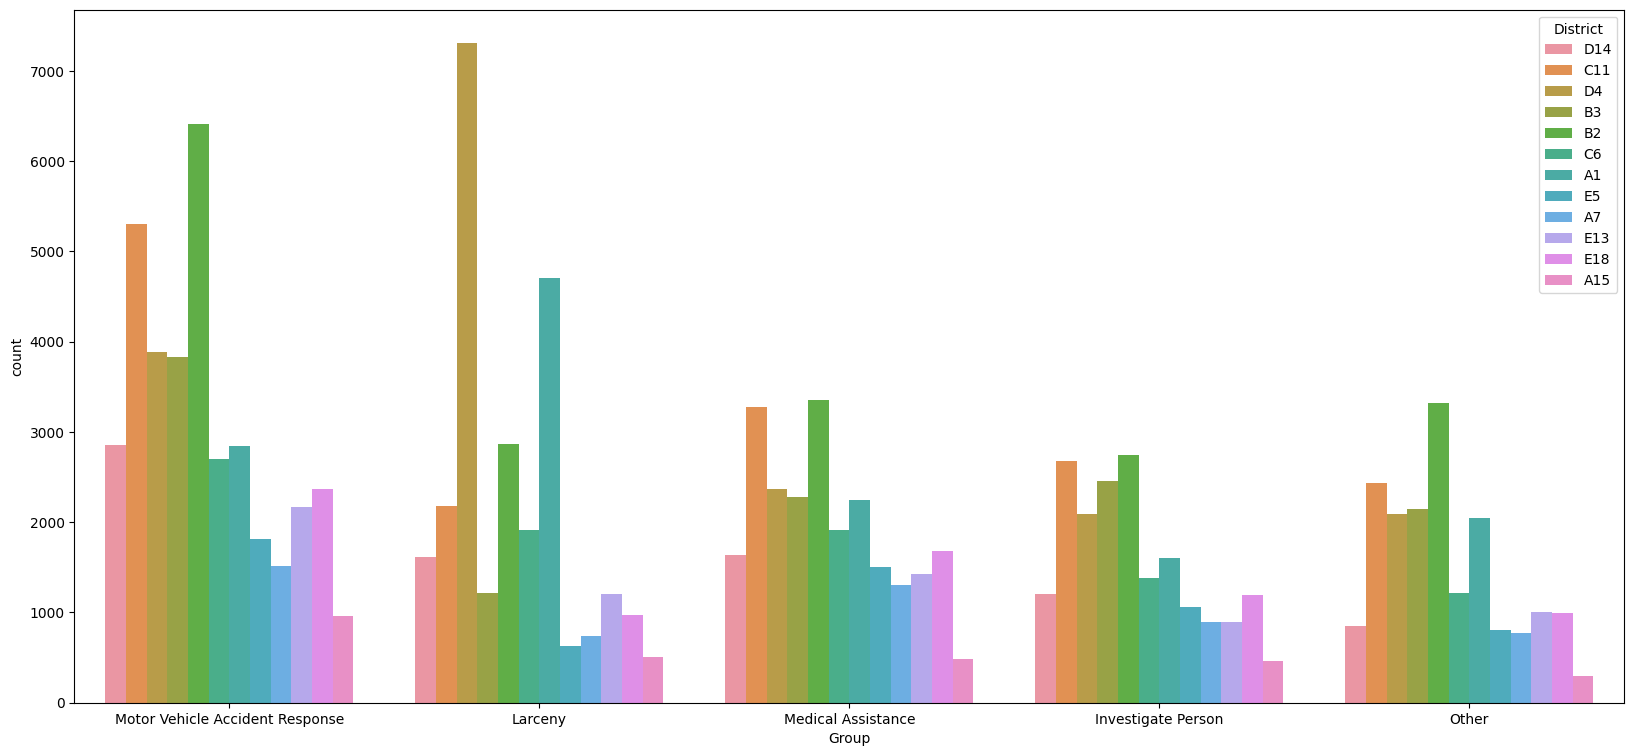

In [11]:
plt.figure(figsize = (20,9)) 
order = boston_data['Group'].value_counts().head(5).index
sns.countplot(data = boston_data, x='Group',hue='District', order = order)

In [22]:
""" labels = boston_data['Group'].astype('category').cat.categories.tolist()
counts = boston_data['Group'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots(figsize = (15,12))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140) 
ax1.axis('equal')
plt.show() """


Number_crimes = boston_data['Group'].value_counts()
values = Number_crimes.values
categories = pd.DataFrame(data=Number_crimes.index, columns=["Group"])
categories['values'] = values

# treemap using plotly
fig = px.treemap( categories, path=['Group'], 
                 title = "Mojor crimes", 
                 height=700, 
                 values= values,
                 color_discrete_sequence = px.colors.sequential.RdBu)
fig.data[0].textinfo = 'label+text+value'
fig.show()

Medical Vehicle Accident Response & Larency are the two main crimes that occur in boston

### When do the crime occur?

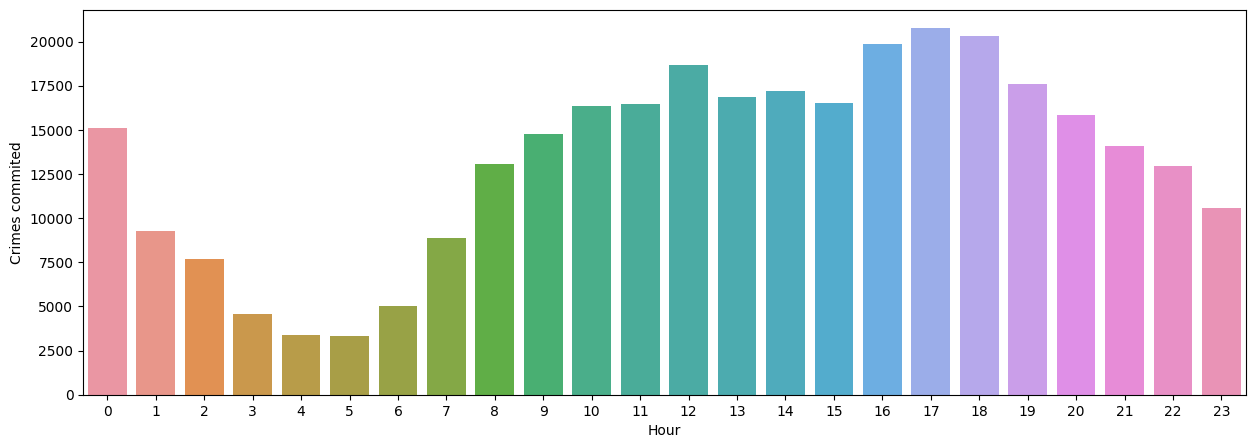

In [13]:
plt.figure(figsize = (15,5))
ax = sns.countplot(x = 'Hour', data = boston_data)
ax.set_ylabel("Crimes commited")
plt.show()

Crimes are less in the morining between 3 A.M to 6 A.M

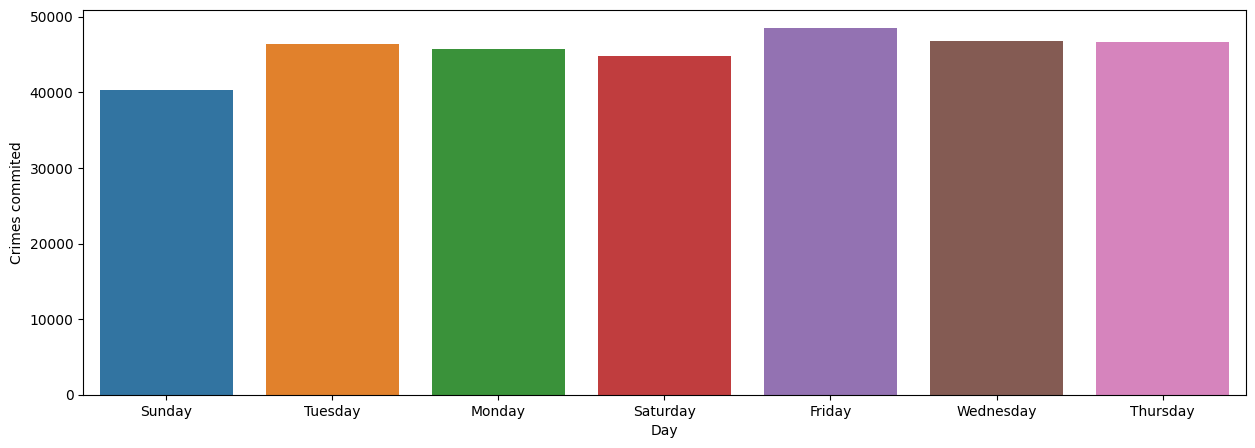

In [14]:
# crimes commited during weeks
plt.figure(figsize = (15,5))
ax = sns.countplot(x = 'Day', data = boston_data)
ax.set_ylabel("Crimes commited")
plt.show()

We cannot a trend of committing crimes on specific day

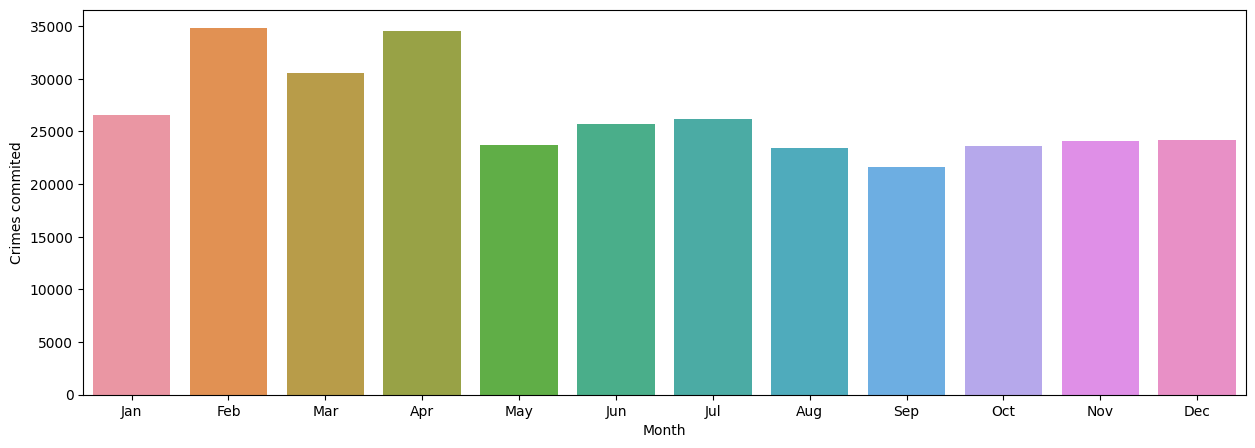

In [15]:
# convert months into readable format
month_map = {
    1 : 'Jan',
    2 : 'Feb',
    3 : 'Mar',
    4 : 'Apr',
    5 : 'May',
    6 : 'Jun',
    7 : 'Jul',
    8 : 'Aug',
    9 : 'Sep',
    10 : 'Oct',
    11 : 'Nov',
    12 : 'Dec'
}

boston_data['Month'] = boston_data['Month'].replace(month_map) 

# crimes commited during a year
plt.figure(figsize = (15,5))
ax = sns.countplot(x = 'Month', data = boston_data)
ax.set_ylabel("Crimes commited")
ax.set_xticklabels(list(month_map.values()))
plt.show()

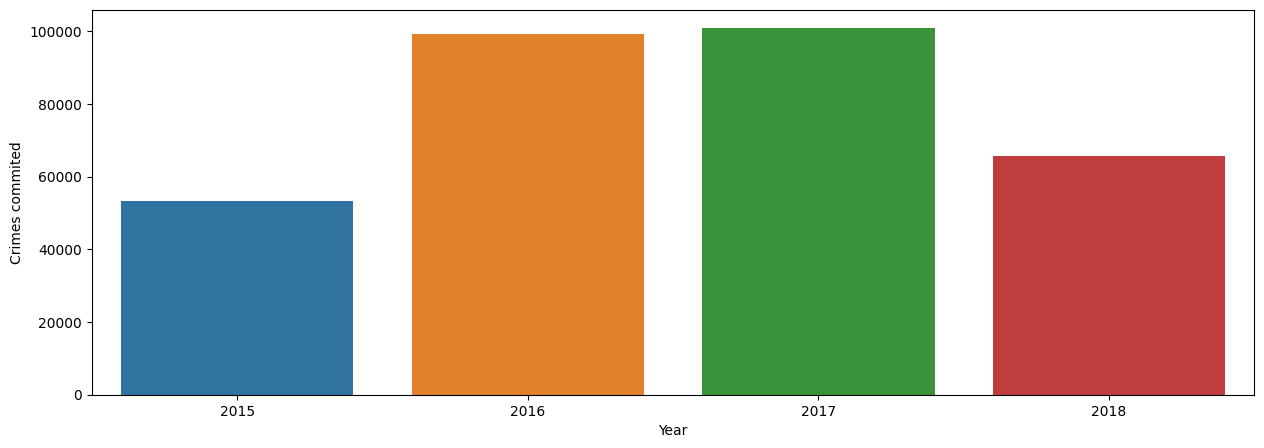

In [16]:
# crimes commited during a year
plt.figure(figsize = (15,5))
ax = sns.countplot(x = 'Year', data = boston_data)
ax.set_ylabel("Crimes commited")
plt.show()

`February` and `April` contains most crime

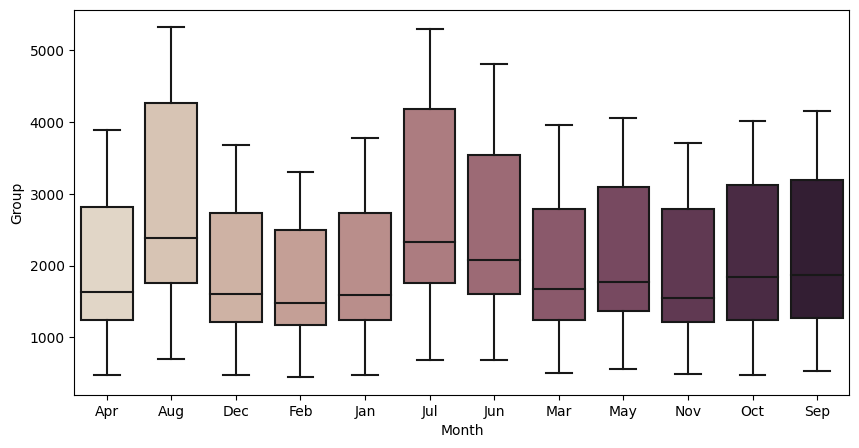

In [17]:
plt.figure(figsize=(10,5))
grouped = boston_data.groupby(['Month','District']).count()
sns.boxplot(x ="Month", y = "Group", data = grouped.reset_index(), palette="ch:.25")
plt.show()

### Where do serious crimes occur?

We can use the latitude and longitude columns to plot the location of crimes in Boston. By setting the alpha parameter to a very small value, we can see that there are some crime 'hotspots'.

(-71.19, -70.99)

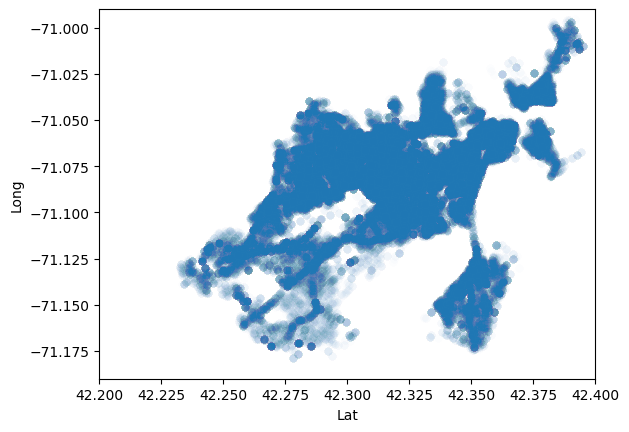

In [18]:
# Simple scatterplot
sns.scatterplot(x='Lat',
               y='Long',
               alpha = 0.01,
               data=boston_data)

plt.xlim(42.2, 42.4)
plt.ylim(-71.19,-70.99)

This scatterplot really looks like Boston. We can notice that Downtown Boston and it's nearby area has the darkest points, but there are also some localities outside of the city center that have especially high crime rates.

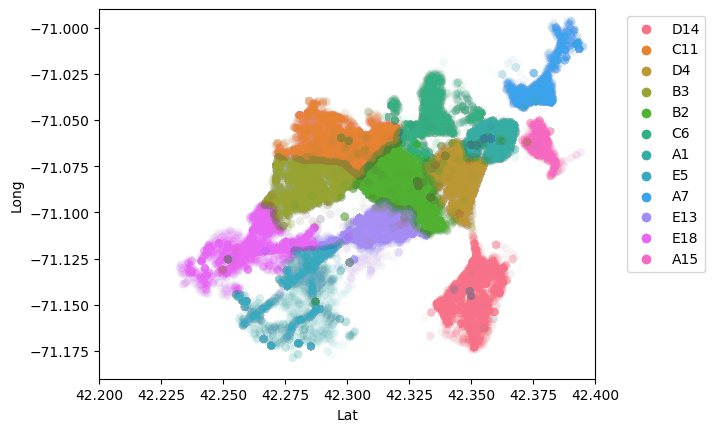

In [19]:
# Plot districts
sns.scatterplot(x='Lat',
               y='Long',
                hue='District',
                alpha=0.01,
               data=boston_data)

plt.xlim(42.2, 42.4)
plt.ylim(-71.19,-70.99)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

We can now associate high crime rates with particular districts, most noteably A1 and D4, which correspond to the most crowded areas of downtown Boston. There is also a very high crime region visibe in district D14.

In [20]:
# Create basic Folium crime map
crime_map = folium.Map(location=[42.3125,-71.0875], 
                      zoom_start = 11)

# Add data for heatmp 
data_heatmap = boston_data[['Lat','Long']]
data_heatmap = boston_data.dropna(axis=0, subset=['Lat','Long'])
data_heatmap = [[row['Lat'],row['Long']] for index, row in data_heatmap.iterrows()]
HeatMap(data_heatmap, radius=10).add_to(crime_map)

# Plot!
crime_map

### Conclusions
In summary, this EDA shows:

* Vehicle Accident & Larceny is by far the most common type of serious crime. <br>
* Serious crimes are most likely to occur in the afternoon and evening.<br>
* Serious crimes are most likely to occur on Friday and least likely to occur on Sunday. <br>
* Serious crimes are most likely to occur in the summer and early fall, and least likely to occur in the winter (with the exeption of January, which has a crime rate more similar to the summer).<br>
* There is no obvious connection between major holidays and crime rates.  <br>
* Serious crimes are most common in the city center, especially districts A1 and D4.

In [23]:
boston_data.head()

INCIDENT_NUMBER  OFFENSE_CODE                 Group           Description  \
0      I182070945           619               Larceny    LARCENY ALL OTHERS   
1      I182070943          1402             Vandalism             VANDALISM   
2      I182070941          3410                 Towed   TOWED MOTOR VEHICLE   
3      I182070940          3114  Investigate Property  INVESTIGATE PROPERTY   
4      I182070938          3114  Investigate Property  INVESTIGATE PROPERTY   

  District REPORTING_AREA                 Date  Year Month      Day  Hour  \
0      D14            808  2018-09-02 13:00:00  2018   Sep   Sunday    13   
1      C11            347  2018-08-21 00:00:00  2018   Aug  Tuesday     0   
2       D4            151  2018-09-03 19:27:00  2018   Sep   Monday    19   
3       D4            272  2018-09-03 21:16:00  2018   Sep   Monday    21   
4       B3            421  2018-09-03 21:05:00  2018   Sep   Monday    21   

     UCR_PART       Street        Lat       Long                     Location  
0    Part One   LINCOLN ST  42.357791 -71.139371  (42.35779134, -71.13937053)  
1    Part Two     HECLA ST  42.306821 -71.060300  (42.30682138, -71.06030035)  
2  Part Three  CAZENOVE ST  42.346589 -71.072429  (42.34658879, -71.07242943)  
3  Part Three   NEWCOMB ST  42.334182 -71.078664  (42.33418175, -71.07866441)  
4  Part Three     DELHI ST  42.275365 -71.090361  (42.27536542, -71.09036101)